# Perkenelan

Milestone 1 Phase  
Muhammad Bintang Ramadhan  
Data Science Batch 08

Dataset :  
    Source : https://archive.ics.uci.edu/ml/datasets/Bank+Marketing    
      
    
    Dalam Milestone 1 ini kita memiliki sebuah dataset terkait campaign marketing bank portugese, campaign marketing yang dilakukan adalah menawarkan produk deposito berjangka kepada calon konsumen menggunakan Telephone atau Celluler.


-   Problem
    -   Diberikan sebuah dataset campaign marketing oleh bank portugese, untuk dianalisa strategi marketing yang tepat untuk campaign marketing penawaran produk deposito berjangka berikutnya.
    -   Bank memiliki 50 data calon konsumen dan meminta saya untuk memprediksi siapa saja yang akan menerima tawaran produk deposito berjangka.

-   Objective
    -   Saya akan melakukan analisa dari plotting fitur-fitur yang dapat mempengaruhi calon konsumen tersebut menerima tawaran produk deposito berjangka atau tidak.
    -   Saya akan membuat machine learning untuk memprediksi 50 data tersebut dengan menggunakan model terbaik, saya akan membandingkan beberapa model untuk mengambil model terbaiknya saja, model-model tersebut diantaranya:
        -   RandomForestClassifier
        -   Naive bayes
        -   KNeighborsClassifier
        -   DecisioTreeClassifier
        -   SVC
        -   LogisticRegression
        -   BaggingClassifier
        -   XGBClassifier

# Import Pustaka

In [1]:
import warnings
warnings.simplefilter("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Split Data
from sklearn.model_selection import train_test_split

# Data Preprocessing
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# evaluation model score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score 
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier

#Model Optimization
from sklearn.model_selection import GridSearchCV

# Import Data

In [2]:
#Import dataset
df_ori = pd.read_csv('bank-additional-full.csv', sep=';') #Import data original disimpan dalam variable df_ori
pd.set_option('display.max_columns', None) #agar seluruh kolom dapat terlihat
df = df_ori.copy() #karna akan melakukan manipulasi terhadap dataset maka dataset ori dicopy kedalam variable df
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
#Mengubah nama kolom target dari y menjadi subscribed agar lebih mudah dipahami
df = df.rename(columns={'y': 'subscribed'})

# Exploratory Data Analayst (EDA)

In [4]:
#cek jenis data, jumlah kolom dan jumlah data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

-   Terdapat 21 kolom dan 41188 baris atau data
-   Tidak terdapat Missing Value pada Kolom
-   Terdapat beberapa jenis tipe data, float 5 kolom, integer 5 kolom dan object 11 kolom

In [5]:
# Untuk memastikan apakah ada Missing Value atau tidak.
mis = df.isnull().sum() #Jumlah Missing Value
misperc = df.isnull().sum() /len(df) *100 #Berapa persen Missing Value
misval = pd.DataFrame({'Missing Value' :mis,'Missing Value %': round(misperc)}) #Julah Missing Value dan Berapa persen Missing Value kedalam sebuah DataFrame
misval[misval['Missing Value'] > 0] #Hanya menampilkan yang memiliki Missing Value 

,Missing Value,Missing Value %


Memang Tidak Terdapat Missing Value pada Dataset ini.

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,subscribed
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


## Visualisasi

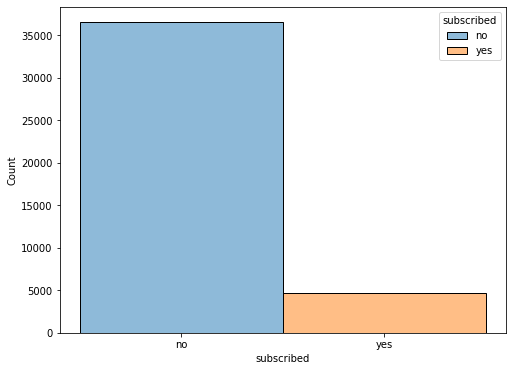

In [8]:
#plotting fitur target
plt.figure(figsize=(8,6))
sns.histplot(data=df, x="subscribed", hue="subscribed")
plt.show()

-   Fitur target sangat berbeda signifikan, lebih banyak yang menolak tawaran produk daripada yang menerimanya

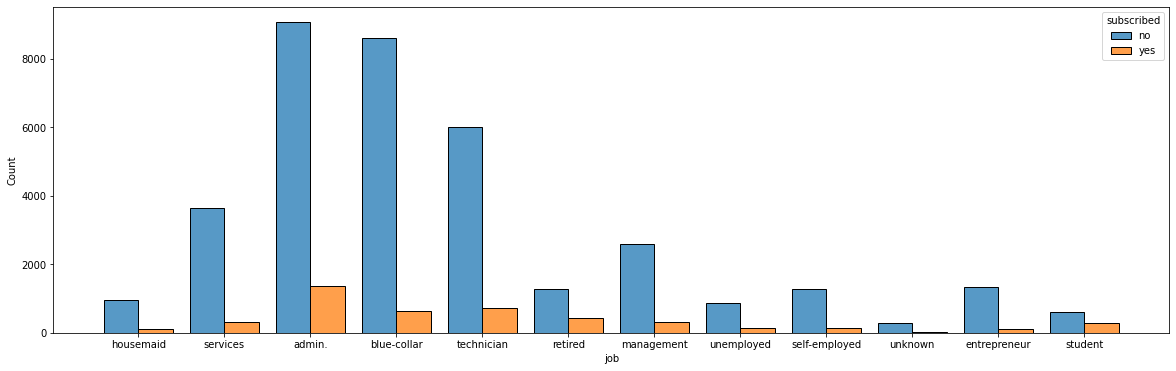

In [9]:
#Plotting fitur job
plt.figure(figsize=(20,6))
sns.histplot(data=df, x="job", hue="subscribed", color=['black','red'], multiple='dodge', shrink=.8)
plt.show()

Dapat dilihat bahwa penawaran produk pada campaign marketing tersebut lebih banyak melakukan penawaran terhadap yang memiliki pekerjaan 'Admin' dan 'Blue Collar'. Usulan dari saya adalah coba untuk explore target dari yang memiliki status pekerjaan lain. 

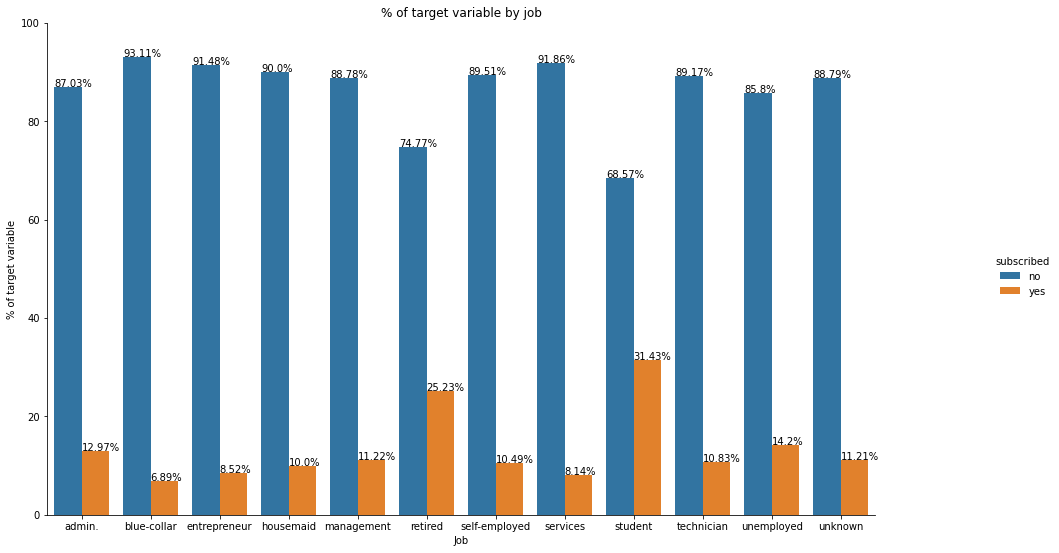

In [10]:
x,y = 'job', 'subscribed'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g= sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.figure.set_figheight(8)
g.figure.set_figwidth(16)
g.ax.set_ylim(0,100)
g.ax.set_xlabel('Job')
g.ax.set_ylabel('% of target variable')
g.ax.set_title("% of target variable by job")
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

Setelah melihat plotting dari berapa banyak tawaran dan berapa banyak yang membuka deposito dari status job ini terlihat bahwa Student dan Retired lebih banyak tertarik membuka Deposito berjangka, menurut saya ini sangat masuk akal mungkin student membuka deposito berjangka agar tabungannya meningkat pada waktu yang telah ditentukan untuk diambil, 

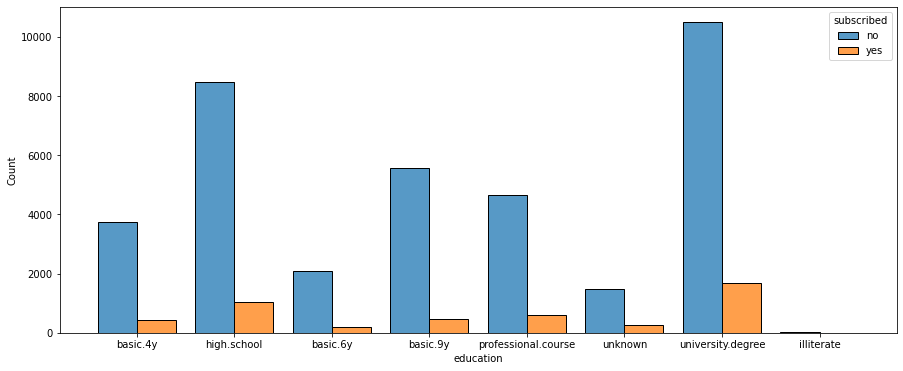

In [11]:
plt.figure(figsize=(15,6))
sns.histplot(data=df, x="education", hue="subscribed", multiple='dodge', shrink=.8)
plt.show()

Konsumen terbanyak yang membuka deposito berjangka adalah memiliki pendidikan terakhir University Degree dan diikuti High School. Saya berasumsi mungkin karena edukasi perbankan kurang tersampaikan kepada mereka yang memiliki pendidikan kurang tinggi. Maka seharusnya perbankan juga melakukan marketing dengan memberikan edukasi-edukasi perbankan terhadap mereka yang kurang memiliki edukasi perbankan.

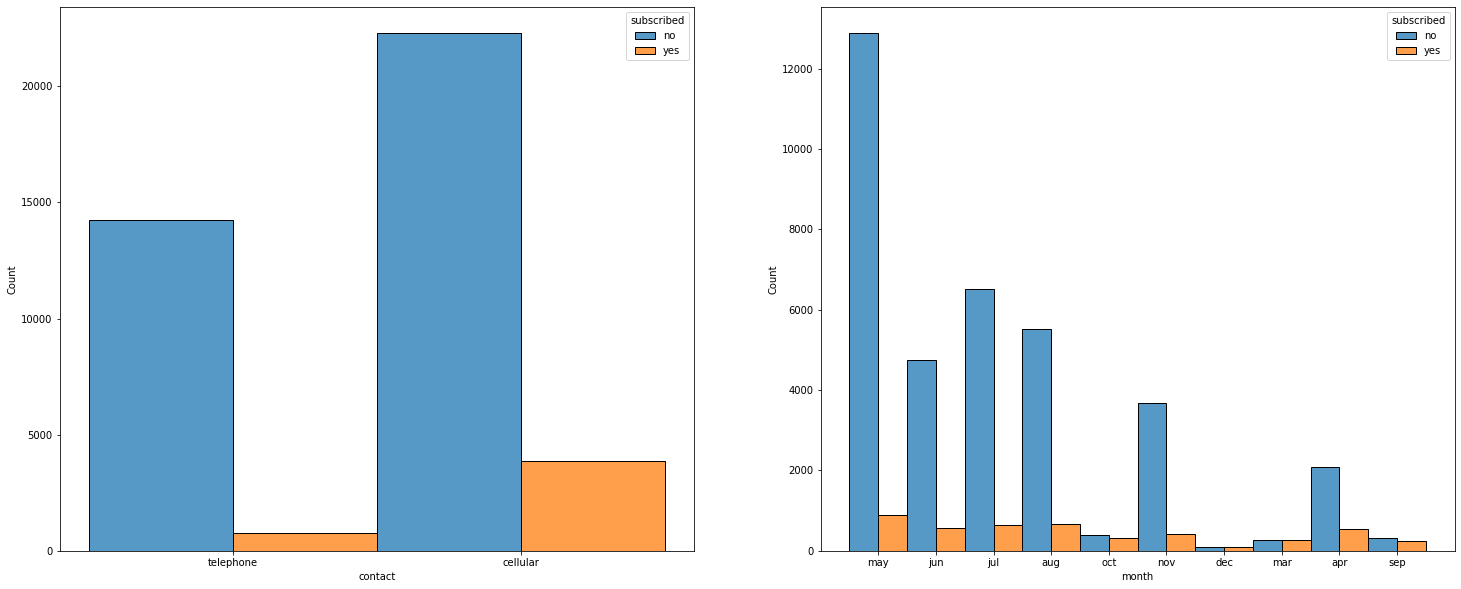

In [12]:
plt.rcParams['figure.figsize'] = (25,10) #Ukuran Plot

#plot 1
plt.subplot(1,2,1)
sns.histplot(data=df, x=df['contact'],hue=df['subscribed'], multiple='dodge') #Melihat jumlah lxft dan uber

#plot 2
plt.subplot(1,2,2)
sns.histplot(data=df, x=df['month'],hue=df['subscribed'], multiple='dodge') #Melihat Jumlah jenis-jenis kendaraan

plt.show()

-   Contact
    -   Dari data diatas dapat dilihat bahwa penawaran produk yang lebih banyak berhasil menarik konsumen adalah menggunakan cellular, itu sangat masuk akal karna masyarakat lebih sering menggunakan cellular dan selalu membawanya, maka akan lebih mudah menghubungi dan menawarkan produk menggunakan cellular daripada telephone.

-   Month
    -   Dari data diatas campaign marketing terlihat kurang optimal di tiap bulannya, hanya optimal pada bulan mei, juni juli dan agustus saja.

In [13]:
#Function 3 plot
def dfplot(plot,x1,y1,x2,y2,x3,y3,h): #untuk mendefinisikan tiap plot menggunakan fitur apa saja
    plt.rcParams['figure.figsize'] = (25,8) #Ukuran seluruh Plot dalam 3 plot

    #plot1
    plt.subplot(1,3,1) 
    plot(data=x1,x=y1, hue=h, multiple='dodge')

    #plot2
    plt.subplot(1,3,2)
    plot(data=x2,x=y2, hue=h, multiple='dodge')
    
    #plot3
    plt.subplot(1,3,3)
    plot(data=x3,x=y3, hue=h, multiple='dodge')

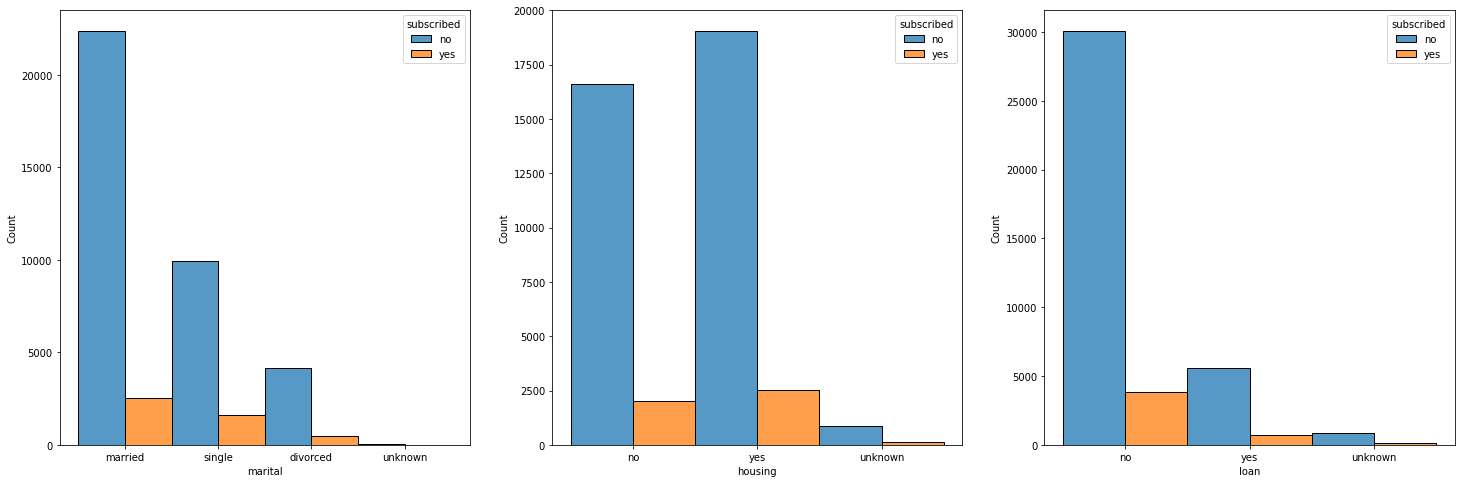

In [14]:
dfplot(sns.histplot,df,'marital',df,'housing',df,'loan', 'subscribed')

-   Marital
    -   Calon konsumen yang memiliki status pernikahan lebih banyak membuka deposito, tetapi saya rasa kurang memiliki perbedaan yang cukup signifikan.
  
-   Housing
    -   Calon konsumen yang memiliki cicilan rumah dan tidak memiliki cicilan rumah tidak berpengaruh untuk membuka deposito, karna dapat dilihat perbedaannya sangat sedikit.
  
-   Loan
    -   Calon konsumen yang tidak memiliki pinjaman personal lebih banyak membuka deposito berjangka.

# Data Preprocessing

## Data Inference

In [15]:
#Mengambil lima puluh data dari dataset untuk dijadikan data inference / yang dijadikan objective data
inf = df.sample(50, random_state=8)
inf.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
16203,49,unemployed,married,basic.4y,unknown,yes,no,telephone,jul,tue,275,4,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
30959,33,services,married,professional.course,no,yes,no,cellular,may,tue,335,2,999,0,nonexistent,-1.8,92.893,-46.2,1.344,5099.1,no
19984,29,admin.,single,university.degree,no,yes,no,cellular,aug,fri,79,3,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25860,30,admin.,divorced,high.school,no,no,no,cellular,nov,wed,131,2,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no
20626,45,blue-collar,married,high.school,unknown,yes,no,cellular,aug,wed,969,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,yes


In [16]:
# Menghapus data Inference dari dalam dataset
df_train_test = df.drop(inf.index)
df_train_test.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [17]:
# Reset Index untuk Data_train_test dan data for inference
df_train_test.reset_index(drop=True, inplace=True)
inf.reset_index(drop=True, inplace=True)

## Feature Selection

In [18]:
#Membuat dataframe untuk meliha korelasi fitur2 numerik terhadap fitur target (subscribed)
df_featselect = df.copy()
df_featselect.subscribed.replace('no', 0, inplace=True)
df_featselect.subscribed.replace('yes', 1, inplace=True)
df_featselect.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


Text(0.5, 1.0, 'Heatmap Korelasi')

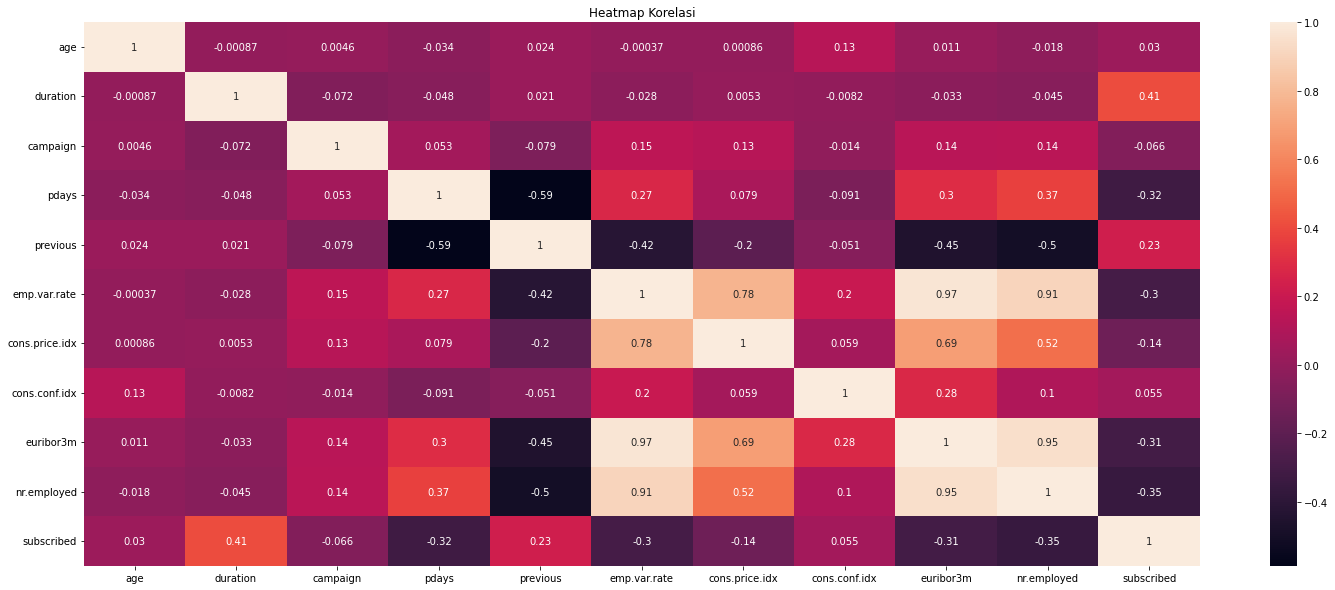

In [19]:
plt.figure(figsize=(25,10)) #Ukuran Plot
sns.heatmap(df_featselect.corr(), annot=True) #Menampilkan korelasi dari df_featselect, yang saya fokuskan korelasi terhadap fitur 'subscribed'
plt.title('Heatmap Korelasi') #Title plot

-   Fitur Numerical
    -   Dari heatmap korelasi tersebut yang memiliki High Correlation terhadap target (subscribed) adalah fitur duration dan previous
    -   Sedangkan yang memiliki Low Correlation (mendekati 0) terhadap target (subscribed) adalah fitur campaign dan cons.conf.idx
    -   Ada juga yang memiliki High Multicollinearity pada fitur nr.employed, conc.price.idx, emp.var.rate dan eruribor3m.
  
Fitur yang memiliki Low Correlation dan High Multicollinearity akan dilakukan drop column atau tidak akan dijadikan sebagai fitur dalam model.

-   Fitur Categorical
    -   Menurut analisa saya fitur-fitur categorical berkorelasi terhadap target, jadi tidak perlu dilakukan drop terhadap fitur manapun.

In [20]:
#Melakukan drop column terhadap fitur-fitur yang tidak akan digunakan dalam model.
df.drop(columns=['campaign', 'cons.conf.idx', 'nr.employed', 'cons.price.idx', 'euribor3m'], inplace=True)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,pdays,previous,poutcome,emp.var.rate,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,999,0,nonexistent,1.1,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,999,0,nonexistent,1.1,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,999,0,nonexistent,1.1,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,999,0,nonexistent,1.1,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,999,0,nonexistent,1.1,no


## Train Test Split

Setelah dilakukan train test split, data train akan displit lagi menjadi data train dan data validation

In [21]:
# Splitting Dataset menggunakan sklearn train_test_split
# Membagi untuk data train 80% dan validation 30%
from sklearn.model_selection import train_test_split

train, val = train_test_split(df, test_size=0.3, random_state=8, stratify=df.subscribed)

print(train.shape)
print(val.shape)

(28831, 16)
(12357, 16)


## Handling Outliers

### Identify Outliers

In [22]:
#function histplot dan boxplot untuk melihat distribusi data
def identify_plots(df, variable):
    plt.figure(figsize=(16, 4))

    # Plot 1 Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Plot 2 Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

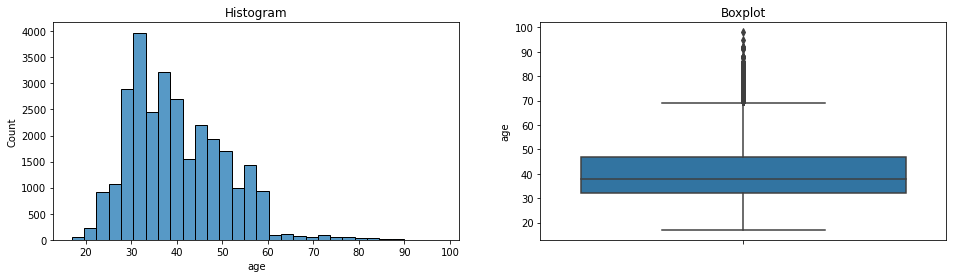

Nilai Skew :  0.7726918621052586



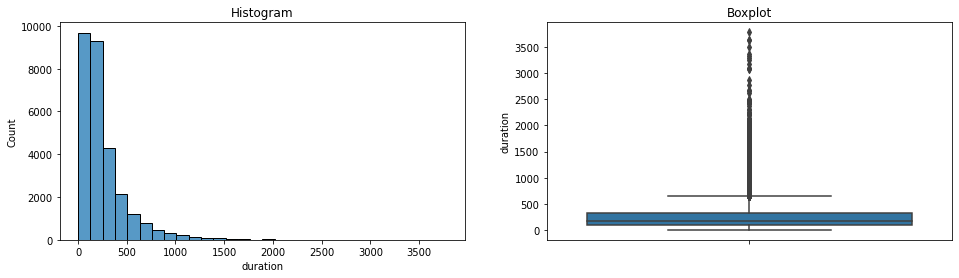

Nilai Skew :  3.1902749353311317



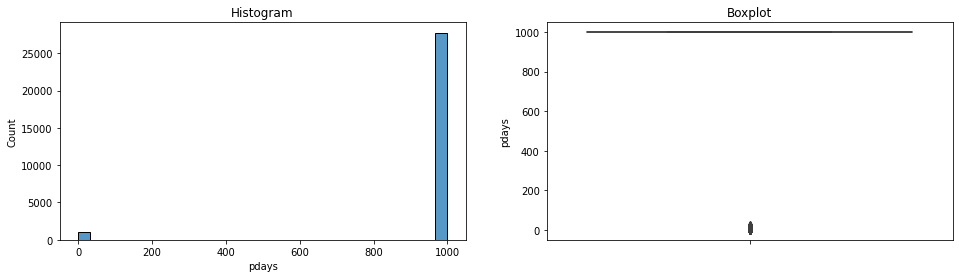

Nilai Skew :  -4.862058178843391



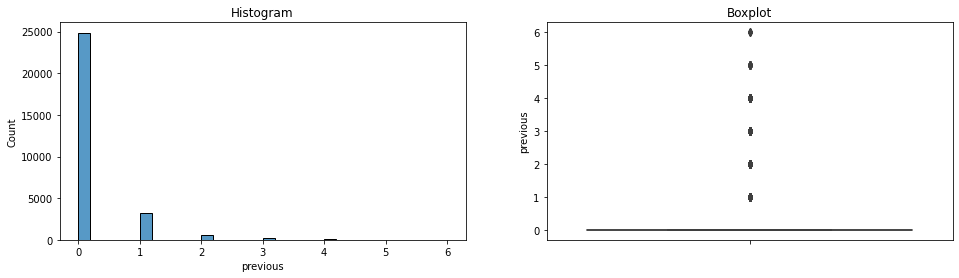

Nilai Skew :  3.8627074292822328



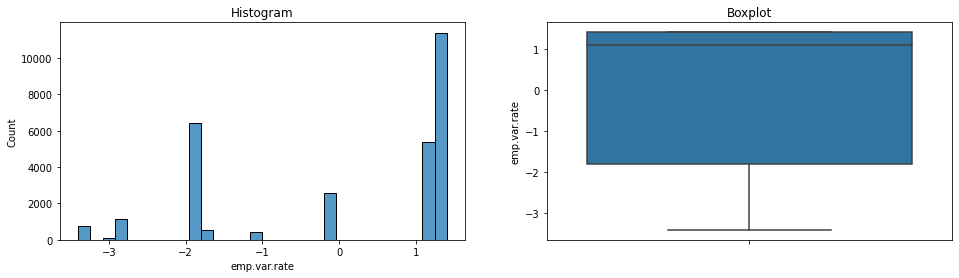

Nilai Skew :  -0.7246636181174619



In [23]:
for var in train.select_dtypes(np.number): #Looping semua data train Numerik
    identify_plots(train, var)
    print('Nilai Skew : ', train[var].skew()) #Nilai skewness dari tiap data numerik 
    print()

Semua fitur memiliki distribusi data Skewness.
-   Skew(+) : age, duration dan previous
-   Skew(-) : pdays dan emp.var.rate

### Outliers Detection

In [24]:
#Membuat function untuk menemukan batas atas dan batas bawah menggunakan IQR
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25) #IQR = Q3 - Q1

    lower_boundary_skew = df[variable].quantile(0.25) - (IQR * distance) #batas bawah skew
    upper_boundary_skew = df[variable].quantile(0.75) + (IQR * distance) #batas atas skew

    return upper_boundary_skew, lower_boundary_skew

#### Outliers Detection for Skew +

Fitur age

In [25]:
# Melihat batas atas dan batas bawah variable age
age_upper_boundary_skew, age_lower_boundary_skew = find_skewed_boundaries(train, 'age', 1.5)
age_upper_boundary_skew, age_lower_boundary_skew

(69.5, 9.5)

In [26]:
# Melihat jumlah dan percent data outliers variable age
print('Jumlah data age diatas 69.5   : {}'.format(len(train[train['age'] > age_upper_boundary_skew])))
print('% Jumlah data age diatas 69.5 : {}'.format(len(train[train['age'] > age_upper_boundary_skew])/len(train) * 100))

Jumlah data age diatas 69.5   : 331
% Jumlah data age diatas 69.5 : 1.1480697859942424


Fitur age memiliki 331 data Outliers atau 1% Outliers, maka akan dilakukan trimming.

Fitur duration

In [27]:
# Melihat batas atas dan batas bawah variable duration
duration_upper_boundary_skew, duration_lower_boundary_skew = find_skewed_boundaries(train, 'duration', 1.5)
duration_upper_boundary_skew, duration_lower_boundary_skew

(647.0, -225.0)

In [28]:
# Melihat jumlah dan percent data outliers variable duration
print('Jumlah data duration diatas 647   : {}'.format(len(train[train['duration'] > duration_upper_boundary_skew])))
print('% Jumlah data duration diatas 647 : {}'.format(len(train[train['duration'] > duration_upper_boundary_skew])/len(train) * 100))

Jumlah data duration diatas 647   : 2083
% Jumlah data duration diatas 647 : 7.224862127571018


Fitur duration memiliki Outliers sebanyak 2083 data atau 7% Outliers, makak akan dilakukan Capping.

Fitur previous

In [29]:
# Melihat batas atas dan batas bawah variable previous
previous_upper_boundary_skew, previous_lower_boundary_skew = find_skewed_boundaries(train, 'previous', 1.5)
previous_upper_boundary_skew, previous_lower_boundary_skew

(0.0, 0.0)

In [30]:
# Melihat jumlah dan percent data outliers variable previous
print('Jumlah data previous diatas 0   : {}'.format(len(train[train['previous'] > previous_upper_boundary_skew])))
print('% Jumlah data previous diatas 0 : {}'.format(len(train[train['previous'] > previous_upper_boundary_skew])/len(train) * 100))

Jumlah data previous diatas 0   : 3960
% Jumlah data previous diatas 0 : 13.73521556657764


Fitur previous memiliki 3960 data Outliers atau 13% Outliers, maka akan dilakukan capping.

#### Outliers Detection for skew -

Fitur emp.var.rate

In [31]:
# Melihat batas atas dan batas bawah variable emp_var_rate
emp_var_rate_upper_boundary_skew, emp_var_rate_lower_boundary_skew = find_skewed_boundaries(train, 'emp.var.rate', 1.5)
emp_var_rate_upper_boundary_skew, emp_var_rate_lower_boundary_skew

(6.200000000000001, -6.6000000000000005)

In [32]:
# Melihat jumlah dan percent data outliers variable emp.var.rate
print('Jumlah data emp.var.rate dibawah -6   : {}'.format(len(train[train['emp.var.rate'] < emp_var_rate_lower_boundary_skew])))
print('% Jumlah data emp.var.rate dibawah -6 : {}'.format(len(train[train['emp.var.rate'] < emp_var_rate_lower_boundary_skew])/len(train) * 100))

Jumlah data emp.var.rate dibawah -6   : 0
% Jumlah data emp.var.rate dibawah -6 : 0.0


Fitur emp.var.rate tidak memiliki Outliers

- Handling Outliers
    -   age 1% Outliers akan dilakukan Trimming
    -   duration 7% Outliers dan previous 13% Outliers akan dilakukan Capping

### Trimming

In [33]:
#Skew
# Menandai Outliers di variable 'age'
outliers_age = np.where(train['age'] > age_upper_boundary_skew, True,
                       np.where(train['age'] < age_lower_boundary_skew, True, False))

In [34]:
#Menghapus Outliers
train_trimmed = train.loc[~(outliers_age)] 

#Melihat Jumlah Data sebelum dan sesudah dilakukan Trimming
print('Data Train - Before trimming : ', train.shape) 
print('Data Train - After trimming  : ', train_trimmed.shape)

Data Train - Before trimming :  (28831, 16)
Data Train - After trimming  :  (28500, 16)


### Capping

In [35]:
#Handling outliers untuk distribusi data skewness + (sisi kanan)
#Capping Outliers fitur duration dan previous
windsoriser = Winsorizer(capping_method='iqr',
                          tail='right',
                          fold=1.5,
                          variables=['duration', 'previous'])

windsoriser.fit(train)

train = windsoriser.transform(train)

Cek distribusi data setelah dilakukan Trimming dan Capping

age - Before Trimming


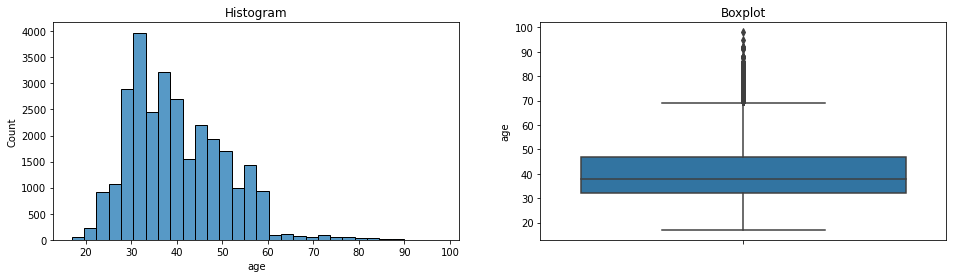


age - After Trimming


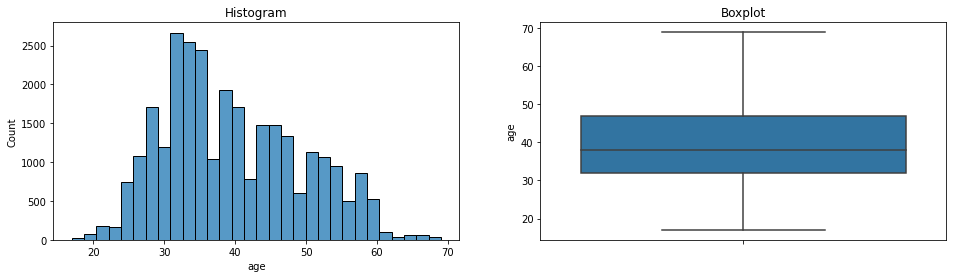

duration - Before capping


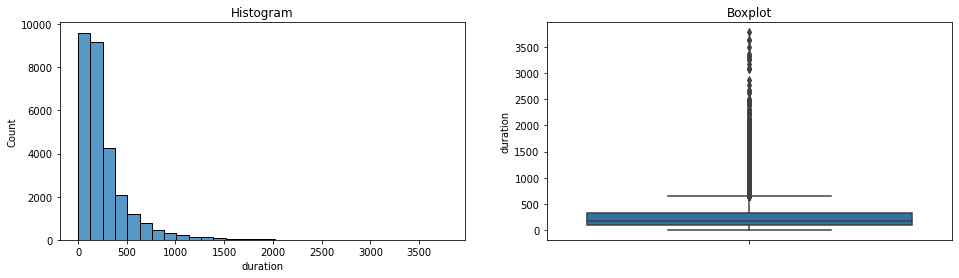


duration - After capping


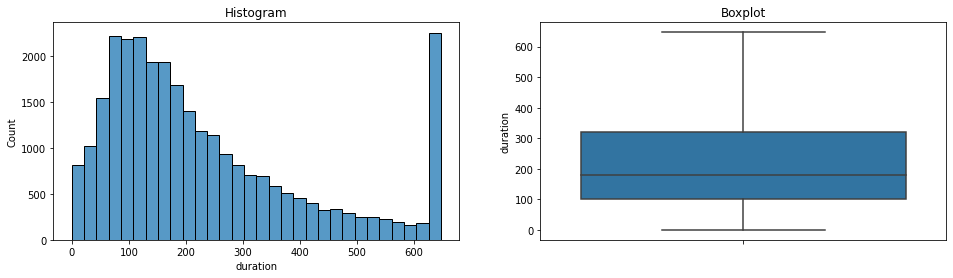

In [36]:
# Cek Sebelum Trimming/capping dan setelah Trimming/capping `age` dan `duration'

#Trimming
print('age - Before Trimming')
identify_plots(train, 'age') # fitur sebelum dilakukan trimming
print('\nage - After Trimming')
identify_plots(train_trimmed, 'age') #fitur setelah dilakukan trimming

#Capping
print('duration - Before capping')
identify_plots(train_trimmed, 'duration') #fitur sebelum dilakukan capping
print('\nduration - After capping')
identify_plots(train, 'duration') # Fitur setelah dilakukan capping

## Pipeline for Scalling and Encoding

In [37]:
# Mendefinikan Target

# untuk Train data
X_train = train_trimmed.drop(columns=['subscribed']) #Fitur
y_train = train_trimmed['subscribed'].replace({'no' : 0, 'yes' : 1}) #Target

# untuk Validation data
X_val = val.drop(columns=['subscribed']) #Fitur
y_val = val['subscribed'].replace({'no' : 0, 'yes' : 1}) #Target

In [38]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(28500, 15)
(28500,)
(12357, 15)
(12357,)


In [39]:
# Membuat Numerical dan Categorical Columns

num_col = X_train.select_dtypes(include=np.number).columns.tolist() 
cat_col = X_train.select_dtypes(include='object').columns.tolist()

cat_col, num_col

(['job',
  'marital',
  'education',
  'default',
  'housing',
  'loan',
  'contact',
  'month',
  'day_of_week',
  'poutcome'],
 ['age', 'duration', 'pdays', 'previous', 'emp.var.rate'])

In [40]:
# Pipeline untuk tipe data Numeric lalu dilakukan scalling
numeric_prep = Pipeline(
    steps=[('imputer', SimpleImputer(strategy='median')), #untuk dataset ini tidak memiliki Missing Value, seandainya fresh data yang dimasukan ada Missing Value jadi bisa otomatis terhandling
            ('scaler', MinMaxScaler())]
)

# Pipeline untuk tipe data categorical lalu dilakukan Encoding
Categorical_prep = Pipeline(
    steps=[('imputer', SimpleImputer(strategy='most_frequent')), #untuk dataset ini tidak memiliki Missing Value, seandainya fresh data yang dimasukan ada Missing Value jadi bisa otomatis terhandling
            ('encode', OneHotEncoder())]
)

In [41]:
#Membuat Pipeline Preprocessing gabungan antara pipeline numerical dan categorical
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_prep, num_col ),
        ('cat', Categorical_prep, cat_col)
    ]
)

# Model

In [42]:
#Membuat 8 model dalam pipeline


#Membuat Model Random Forest Classifier
# Model Random Forest Classifier dan pipeline preprocessing dimasukan kedalam satu Pipeline model
pipe_rf = Pipeline([
    ('prep', preprocessor),
    ('rf', RandomForestClassifier())
])

#Membuat Model Naive Bayes
# Model Naive Bayes dan pipeline preprocessing dimasukan kedalam satu Pipeline model
pipe_nb = Pipeline([
    ('prep', preprocessor),
    ('nb', GaussianNB())
])

#Membuat Model KNNeighbors
# Model KNNeighbors dan pipeline preprocessing dimasukan kedalam satu Pipeline model
pipe_knn = Pipeline([
    ('prep', preprocessor),
    ('knn', KNeighborsClassifier())
])

#Membuat Model Decision Tree
# Model Decision Tree dan pipeline preprocessing dimasukan kedalam satu Pipeline model
pipe_dt = Pipeline([
    ('prep', preprocessor),
    ('dt', DecisionTreeClassifier())
])

#Membuat Model Support Vector Machine
# Model Support Vector Machine dan pipeline preprocessing dimasukan kedalam satu Pipeline model
pipe_svc = Pipeline([
    ('prep', preprocessor),
    ('svc', SVC())
])

#Membuat Model Logistic Regression
# Model Logistic Regression dan pipeline preprocessing dimasukan kedalam satu Pipeline model
pipe_logreg = Pipeline([
    ('prep', preprocessor),
    ('logreg', LogisticRegression(random_state=8))
])

#Membuat Model Bagging Classifier
# Model Bagging Classifier dan pipeline preprocessing dimasukan kedalam satu Pipeline model
pipe_bag = Pipeline([
    ('prep', preprocessor),
    ('bag', BaggingClassifier(base_estimator=DecisionTreeClassifier()))
])

#Membuat Model XGBClassifier
# Model XGBClassifier dan pipeline preprocessing dimasukan kedalam satu Pipeline model
pipe_xgb = Pipeline([
    ('prep', preprocessor),
    ('xgb', XGBClassifier())
])


# Evaluation Score

Model Training and Model Prediction score

In [43]:
MLA = [
    pipe_rf,
    # pipe_nb,
    pipe_knn,
    pipe_dt,
    pipe_svc,
    pipe_logreg,
    pipe_bag,
    pipe_xgb
]
  

In [44]:
# Predict & Evaluation score
name = []
train_accuracy = []
val_accuracy = []
precision = []
recall = []
f1score = []
test_score = []
for alg in MLA:
    name.append(alg.steps[1][1].__class__.__name__)
    alg.fit(X_train, y_train)
    y_pred_train = alg.predict(X_train)
    y_pred_val = alg.predict(X_val)
    train_accuracy.append(accuracy_score(y_train, y_pred_train))
    val_accuracy.append(accuracy_score(y_val, y_pred_val))
    precision.append(precision_score(y_val, y_pred_val))
    recall.append(recall_score(y_val, y_pred_val))
    f1score.append(f1_score(y_val, y_pred_val))

compare = pd.DataFrame({'Name': name, 'Train Accuracy': train_accuracy, 'Val Accuracy': val_accuracy, 'Precission Score': precision, 'Recall Score': recall, 'F1 Score': f1score})

[23:38:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [45]:
compare.sort_values(by = 'Val Accuracy', ascending=False)

,Name,Train Accuracy,Val Accuracy,Precission Score,Recall Score,F1 Score
6,XGBClassifier,0.958982,0.911224,0.633243,0.503592,0.561024
0,RandomForestClassifier,1.000000,0.910011,0.658371,0.418103,0.511424
4,LogisticRegression,0.911193,0.908716,0.669666,0.374282,0.480184
5,BaggingClassifier,0.993228,0.902403,0.586271,0.454023,0.511741
3,SVC,0.905789,0.899652,0.686275,0.201149,0.311111
1,KNeighborsClassifier,0.915474,0.893664,0.575875,0.212644,0.310598
2,DecisionTreeClassifier,1.000000,0.885652,0.492611,0.502874,0.497689


-   Hasil dari Validation Accuracy tertinggi adalah XGBClassifier, tetapi model XGBClassifier ini overfit.
-  Validation Accuracy perbandingan tiap modelnya sangat berbeda tipis, maka akan saya lakukan model optimisasi terhadap 3 model Validation Accuracy tertinggi yaitu XGBClassifier, RandomForestClassifier dan Logistic Regression

### Cross Validation Score

In [46]:
cv_result = cross_val_score(pipe_xgb, X_val, y_val, scoring='accuracy', cv=5)
cv_result.mean()

[23:38:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:38:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:38:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:38:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

nan

## Hyperparameter Tuning

### Hyperparameter Tuning XGBClassifier

In [47]:
#membuat list parameter yang akan diseleksi menggunakan teknik GridSearhCV
param_grid_xgb = [
    {
    'xgb__n_estimators': [100, 200, 500],
    'xgb__learning_rate': [0.01,0.05,0.1],
    'xgb__booster': ['gbtree', 'gblinear'],
    'xgb__gamma': [0, 0.5, 1],
    'xgb__reg_alpha': [0, 0.5, 1]
    }
]

In [48]:
#Teknik GridSearchCV dengan 3x cross validation
clf_xgb = GridSearchCV(pipe_xgb, param_grid = param_grid_xgb, cv = 3, verbose=True, n_jobs=-1)

#train GridSearchCV terhadap dataset
best_clf_xgb = clf_xgb.fit(X_train, y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits
[23:55:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [49]:
#melihat best parameter dari model XGBClassifier
best_clf_xgb.best_params_

{'xgb__booster': 'gbtree',
 'xgb__gamma': 0,
 'xgb__learning_rate': 0.01,
 'xgb__n_estimators': 100,
 'xgb__reg_alpha': 0}

In [50]:
#Membuat model XGBClassifier dengan menggunakan best parameter
best_xgb = best_clf_xgb.best_estimator_

### Hyperparameter Tuning Logistic Regression

In [51]:
#membuat list parameter yang akan diseleksi menggunakan teknik GridSearhCV
param_grid = [
    {'logreg__penalty' : ['l2','none'],
    'logreg__C' : np.logspace(-4,4,20),
    'logreg__solver' : ['newton-cg', 'liblinear','saga'],
    'logreg__max_iter' : [100, 1000, 2500]
    }
]

In [52]:
#Teknik GridSearchCV dengan 3x cross validation
clf = GridSearchCV(pipe_logreg, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

#train GridSearchCV terhadap dataset
best_clf = clf.fit(X_train, y_train)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


In [53]:
#melihat best parameter
best_clf.best_params_

{'logreg__C': 0.0001,
 'logreg__max_iter': 100,
 'logreg__penalty': 'l2',
 'logreg__solver': 'newton-cg'}

In [54]:
#Membuat model LogisticRegression dengan menggunakan best parameter
best_logreg = best_clf.best_estimator_

### Hyperparameter Tuning RandomForestClassifier

In [55]:
#membuat list parameter yang akan diseleksi menggunakan teknik GridSearhCV
grid_param_rf = [
    {'rf__n_estimators': [5,20,50],
    'rf__max_features': ['auto'], 
    'rf__max_depth': [int(x) for x in np.linspace(80, 120, num = 4)],
    'rf__bootstrap': [False],
    'rf__min_samples_split' : [2, 6],
    'rf__min_samples_leaf' : [4, 5]
    }
]

In [56]:
#Teknik GridSearchCV dengan 3x cross validation
clf_rf = GridSearchCV(pipe_rf, param_grid = grid_param_rf, cv = 3, verbose=True, n_jobs=-1)

#train GridSearchCV terhadap dataset
best_clf_rf = clf_rf.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


In [57]:
#Melihat best parameter
best_clf_rf.best_params_

{'rf__bootstrap': False,
 'rf__max_depth': 80,
 'rf__max_features': 'auto',
 'rf__min_samples_leaf': 4,
 'rf__min_samples_split': 2,
 'rf__n_estimators': 5}

In [58]:
#Membuat model RandomForestClassifier dengan menggunakan best parameter
best_rf = best_clf_rf.best_estimator_

### Compare best model

In [59]:
best_ml = [best_logreg, best_rf, best_xgb]

# Predict & Evaluation score
name = []
train_accuracy = []
val_accuracy = []
precision = []
recall = []
f1score = []
test_score = []
for alg in best_ml:
    name.append(alg.steps[1][1].__class__.__name__)
    alg.fit(X_train, y_train)
    y_pred_train = alg.predict(X_train)
    y_pred_val = alg.predict(X_val)
    train_accuracy.append(accuracy_score(y_train, y_pred_train))
    val_accuracy.append(accuracy_score(y_val, y_pred_val))
    precision.append(precision_score(y_val, y_pred_val))
    recall.append(recall_score(y_val, y_pred_val))
    f1score.append(f1_score(y_val, y_pred_val))

compare_best_model = pd.DataFrame({'Name': name, 'Train Accuracy': train_accuracy, 'Val Accuracy': val_accuracy, 'Precission Score': precision, 'Recall Score': recall, 'F1 Score': f1score})

[00:05:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


### Best Model

In [60]:
compare_best_model.sort_values(by = 'Val Accuracy', ascending=False)

,Name,Train Accuracy,Val Accuracy,Precission Score,Recall Score,F1 Score
2,XGBClassifier,0.921544,0.912034,0.662407,0.446839,0.533677
1,RandomForestClassifier,0.952386,0.907097,0.635556,0.410920,0.499127
0,LogisticRegression,0.891439,0.887351,0.000000,0.000000,0.000000


-   Setelah menggunakan best parameter dari XGBClassifier kini model goodfit yang semulanya menggunakan base model adalah overfit dan Model ini memiliki Val Accuracy tertinggi dari model lainnya. Maka dengan itu saaya akan menggunakan XGBClassifier sebagai model untuk menyelasikan kasus ini.

### Base Model

Dimunculkan hanya sebagai pembanding dari best Model

In [61]:
compare.sort_values(by = 'Val Accuracy', ascending=False)

,Name,Train Accuracy,Val Accuracy,Precission Score,Recall Score,F1 Score
6,XGBClassifier,0.958982,0.911224,0.633243,0.503592,0.561024
0,RandomForestClassifier,1.000000,0.910011,0.658371,0.418103,0.511424
4,LogisticRegression,0.911193,0.908716,0.669666,0.374282,0.480184
5,BaggingClassifier,0.993228,0.902403,0.586271,0.454023,0.511741
3,SVC,0.905789,0.899652,0.686275,0.201149,0.311111
1,KNeighborsClassifier,0.915474,0.893664,0.575875,0.212644,0.310598
2,DecisionTreeClassifier,1.000000,0.885652,0.492611,0.502874,0.497689


### Confusion Matrix

Confusion Matrix XGBClassifier

<Figure size 1440x576 with 0 Axes>

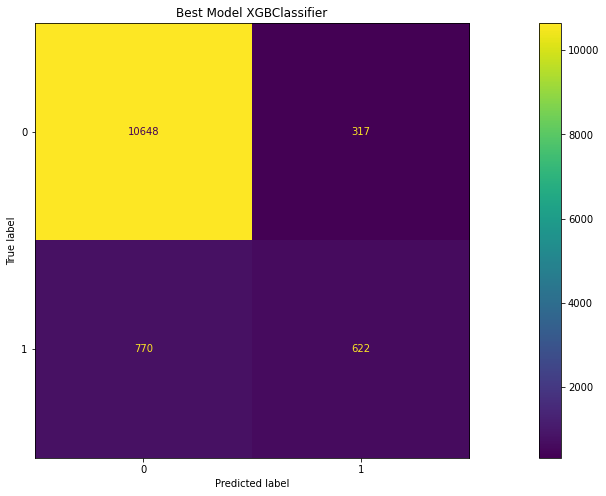

In [62]:
y_pred_val_best_xgb = best_xgb.predict(X_val)
cf_best_xgb = confusion_matrix(y_val, y_pred_val_best_xgb)

#Confusion metrics
plt.figure(figsize = (20, 8))
disp_best_xgb = ConfusionMatrixDisplay(confusion_matrix=cf_best_xgb)
disp_best_xgb.plot()
plt.title('Best Model XGBClassifier')
plt.show()

-   False Positif = 10610  
-   False Negatif = 355  
-   True Positif = 637  
-   True Negatif = 755  
  
Menurut saya dikarenakan variable target tidak balance ('No' > 'Yes') jadi model terlalu banyak belajar dari dependent variable 'No', dapat dilihat dalam memprediksi 'No' hanya memiliki 355 False Negatif dari False Positif 10610, Sedangkan ketika memprediksi 'Yes' True Negatif 755 lebih besar dari True Positif 637.

# Model Inference

Memecahkan kasus yang diberikan bank untuk memprediksi 50 data dan memilih mana yang akan membuka Deposito Berjangka

In [63]:
inf.drop(columns='subscribed', inplace=True)

In [64]:
#prediksi data inference / 50 data objective
y_pred_inf = best_xgb.predict(inf)
prediction = pd.DataFrame(y_pred_inf, columns=['Prediction'])
result_prediction = pd.concat([inf,prediction],axis=1)
result_prediction

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Prediction
0,49,unemployed,married,basic.4y,unknown,yes,no,telephone,jul,tue,275,4,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
1,33,services,married,professional.course,no,yes,no,cellular,may,tue,335,2,999,0,nonexistent,-1.8,92.893,-46.2,1.344,5099.1,0
2,29,admin.,single,university.degree,no,yes,no,cellular,aug,fri,79,3,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0
3,30,admin.,divorced,high.school,no,no,no,cellular,nov,wed,131,2,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,0
4,45,blue-collar,married,high.school,unknown,yes,no,cellular,aug,wed,969,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,1
5,43,admin.,married,university.degree,unknown,yes,no,telephone,may,fri,2016,2,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,1
6,35,unknown,single,high.school,unknown,yes,no,cellular,jul,thu,277,3,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,0
7,34,technician,married,university.degree,no,yes,no,telephone,may,tue,226,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
8,49,services,married,high.school,unknown,no,no,cellular,nov,fri,66,2,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
9,37,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,thu,364,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0


-   Jika hasil prediction = 1 itu berarti yang akan membuka deposito berjangka, sedangkan jika prediction = 0 maka tidak akan membuka deposito berjangka

In [65]:
# Query data memilih data yang akan membuka Deposito Berjangka
result_prediction[
    (result_prediction['Prediction'] == 1)
]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Prediction
4,45,blue-collar,married,high.school,unknown,yes,no,cellular,aug,wed,969,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,1
5,43,admin.,married,university.degree,unknown,yes,no,telephone,may,fri,2016,2,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,1
21,27,admin.,single,university.degree,no,no,no,cellular,aug,fri,562,2,3,3,success,-1.7,94.027,-38.3,0.905,4991.6,1
40,54,technician,divorced,professional.course,unknown,yes,no,cellular,aug,thu,1117,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,1


Dari 50 data yang diprediksi hanya 4 data yang akan membuka Deposito Berjangka.

# Conclussion

Model  

Model yang saya pilih adalah XGBClassifier, pada semulanya menggunakan base parameter model overfit, setelah menggunakan best parameter model menjadi goodfit dengan accuracy 0.91, menurut saya itu score accuracy yang cukup baik. Akan tetapi ketika melihat Confusion Matrix saya rasa dikarenakan variable target tidak balance ('No' > 'Yes') jadi model lebih banyak mempelajari 'No'.  
Seharusnya dalam data preprocessing melakukan balancing data target.

-   Problem 1
    -   Diberikan sebuah dataset campaign marketing oleh bank portugese, untuk dianalisa strategi marketing yang tepat untuk campaign marketing penawaran produk deposito berjangka berikutnya.

-   Result 1
    -   Hasil dari analisa saya melihat dari Exploratory Data Analyst (EDA) bahwa campaign sebelumnya kurang optimal memberikan tawaran produk terhadap calon konsumen, saya menarik kesimpulan berikut karna dapa dilihat data campaign marketing berdasarkan bulan hanya banyak dilakukan pada bulan Mei, Juni, Juli dan agustus saja, bahkan pada bulan Januari dan Februari tidak dilakukan sama sekali.  
    -   Dilihat data berdasarkan status pekerjaan campaign sebelunya condong banyak menawarkan kepada yang memiliki status pekerjaan Admin dan Blue Collar, Menurut saya kedepannya lebih baik untuk lebih explore dalam penawaran produk terhdap yang memiliki status pekerjaan lain bisa jadi lebih potensial, dari hasi EDA retired dan student terlihat cenderung lebih memiliki ketertarikan untuk membuka deposito berjangka ini, mungkin bisa dibuatkan penawaran/promo khusus terhadap retired dan student.  
    -   Seperti yang dilihat di EDA diatas, bahwa yang membuka deposito berjangka condong kepada mereka yang memiliki pendidikan tinggi seperti lulusan University degrre dan High School, mungkin mereka mengetahui keuntungan membuka deposito berjangka karena mendapat edukasi perbankan, maka saran saya untuk melakukan campaign edukasi perbankan.


-   Problem 2
    -   Bank memiliki 50 data calon konsumen dan meminta saya untuk memprediksi siapa saja yang akan menerima tawaran produk deposito berjangka.
  
-   Result 2
    -   Dari 50 data yang diberikan telah saya prediksi menggunakan Machine Learning model XGBClassifier, hasilnya dari 50 data tersebut hanya 4 data yang diprediksi akan membuka deposito berjangka.